<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI285/INF285 Computación Científica </h1>
    <h1> Tarea N°1: Introducción a Jupyter Notebook </h1>
    <h3> [S]cientific [C]omputing [T]eam 2018</h3>
</center>

<p>
<center>_Marzo 2018_ </center>
</p>

In [143]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import time

## Introducción

El objetivo de este laboratorio es dar una instroducción a jupyter notebook, para ello se realizaran 3 actividades:

    1- Despejar un sistema de ecuaciones mediante metodos matriciales, despjenaod el costo de ciertas vitaminas para una farmacia.
    2- Se generara una matriz de Hilbert de distintos tamaños y se calcularan ciertos vectores mediante dos metodos distintos para luego analizarlos y compararlos mediante metricas de tiempo de procesamiento.
    3- Se ejecutara 50 veces la misma funcion de Hilbert de la pregunta 2 en distintos tamaños de matrices y se analizara como se comporta el tiempo de procesamiento en los distintos tamaños de la matriz.
    
Por cada pregunta, se analizara y se concluiran resultados.

In [144]:
from scipy.linalg import hilbert
from sklearn.metrics import mean_squared_error as mse
import random
import time

## Pregunta 1

1) Una farmacia vende 10 frascos de vitamina A, 5 frascos de vitamina C y 25 frascos de vitamina D, todo por un valor de 355 pesos. Además, vende 20 frascos de vitamina A, 10 de vitamina C y 10 de vitamina D por un total de 310 pesos. Por otra parte vende 12 frascos de vitamina A, 4 de vitamina C y 15 de vitamina D por un total de 266 pesos. Encuentra el costo correspondiente a cada frasco de las vitaminas A, C y D.

In [145]:
a = np.array([[10,5,25],[20,10,10],[12,4,15]])
b = np.array([355,310,266])
x = linalg.solve(a,b)
print("Costo Vitamina A: %s" % (int(x[0])))
print("Costo Vitamina C: %s" % (int(x[1])))
print("Costo Vitamina D: %s" % (int(x[2])))

Costo Vitamina A: 7
Costo Vitamina C: 5
Costo Vitamina D: 10


2) Se tiene el siguiente sistema de ecuaciones:

\begin{align}
6x_1 - 5x_2 - 7x_3 - 4x_4 + 3x_5 + 8x_6 &= -44 \\
-7x_1 + 4x_2 + 7x_3 + 1x_4 - 3x_5 + 8x_6 &= 8 \\
6x_1 - 3x_2 + 7x_3 - 6x_4 + 5x_5 - 6x_6 &= 104 \\
8x_1 - 5x_2 + 7x_3 + x_4 - 6x_5 + 4x_6 &= 44\\
2x_1 + 8x_2 + 6x_3 + 2x_4 - 8x_5 + 3x_6 &= -47\\
-2x_1 + 4x_2 + 5x_3 + 7x_4 - 6x_5 - 5x_6 &= 6
\end{align}

Represente ambos problemas como un sistema matricial, es decir de la forma $A\mathbf{x}$ = $ \mathbf{b}$ , luego encuentre los valores del vector $\mathbf{x}$: 
* Usando la función *solve* de SciPy [[1]](#bib).
* Haciendo uso de la inversa de A y el vector $\mathbf{b}$. ($\mathbf{x} = A^{-1} \mathbf{b}$).

Además, calcule el tiempo que demoran los dos métodos anteriores.

In [146]:
start = time.clock()
a = np.array([[6,-5,-7,-4,3,8],[-7,4,7,1,-3,8],[6,-3,7,-6,5,-6],[8,-5,7,1,-6,4],[2,8,6,2,-8,3],[-2,4,5,7,-6,-5]])
b = np.array([-44,8,104,44,-47,6])
x = linalg.solve(a,b)
print(x)
end = time.clock()
tt = end-start
print("Tiempo metodo solve: %f segundos" % (tt))

[-2. -7.  8. -1.  3. -3.]
Tiempo metodo solve: 0.002869 segundos


In [147]:
start = time.clock()
a = np.array([[6,-5,-7,-4,3,8],[-7,4,7,1,-3,8],[6,-3,7,-6,5,-6],[8,-5,7,1,-6,4],[2,8,6,2,-8,3],[-2,4,5,7,-6,-5]])
b = np.array([-44,8,104,44,-47,6])
x = linalg.inv(a).dot(b)
print(x)
end = time.clock()
tt = end-start
print("Tiempo calculando la inversa: %f segundos" % (tt))

[-2. -7.  8. -1.  3. -3.]
Tiempo calculando la inversa: 0.002494 segundos


## Análisis

Al realizar distintas ejecuciones los tiempos del método solve o de calculando la inversa varían, siendo uno más grande que otro en algunos casos o iguales, por lo cual es dificil saber concretamente cual método es mas rápido que el otro. Pero por lo visto, el tiempo de ejecución de solve tiende a ser mas bajo que el de la inversa (lo que uno lógicamente esperaría)

## Conclusión

No se puede concluir con los datos actuales cual metodo es más rapido que el otro, pero por otro lado se puede concluir que se requiere un análisis mas exhaustivo de los tiempos de procesamiento de cada metodo(el que se realizará mas adelante).

## Pregunta 2

La matriz de Hilbert es una matriz cuadrada que cuenta con la siguiente forma:

$$
H_{i,j} = \frac{1}{i+j-1}, i,j = 1\ldots n
$$

Construya la función *Hilbert(n)*, mediante la siguiente estructura:

```python
'''
n - (integer) Matrix size
H - (2D-array) Hilbert matrix
x - (1D-array) Random vector x
b - (1D-array) Vector result of Ax
'''
```
```python     
def Hilbert(n):
    ...
    return H, x, b
```

Esta función deberá retornar matrices de Hilbert, vectores $\mathbf{x}$ de forma aleatoria (recuerde elegir una semilla para poder reproducir sus experimentos) y un vector $\mathbf{b}$ construido a partir de $A\mathbf{x} = \mathbf{b}$. Se deberá mostrar a través de un gráfico los tiempos de resolución de cada método (usando la función *solve* de SciPy y resolviendo directamente $\mathbf{x} = A^{-1} \mathbf{b}$) para matrices de tamaño 10, 100, 300, 500, 700, 1000, 1300. Calcule el error de sus dos métodos con respecto al vector $\mathbf{x}$ creado anteriormente y grafique el tamaño de la matriz vs el error. Concluya.

Para los gráficos de tiempo, ocupe la función *loglog*, y para los de error *semilogy* [[2]](#bib).

In [148]:
def Hilbert(n):
    np.random.seed(44)
    H = hilbert(n)
    x = np.random.rand(n)
    b = np.dot(H,x)
    return H,x,b


def calcularX(metodo):
    the_list = [10,100, 300, 500, 700, 1000, 1300]
    time_list = []
    error_list = []
    for i in the_list:
        start = time.clock()
        H,x,b = Hilbert(i)
        if(metodo == 1):
            new_x = linalg.solve(H,b)
        elif(metodo == 2):
            new_x = linalg.inv(H).dot(b)
        end = time.clock()
        time_list.append(end-start)
        error_list.append(mse(x,new_x))
    return time_list, error_list

        
tiempo1,error1 = calcularX(1)
tiempo2,error2 = calcularX(2)

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.279889739544296e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.739638459522049e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.894135436986915e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. 

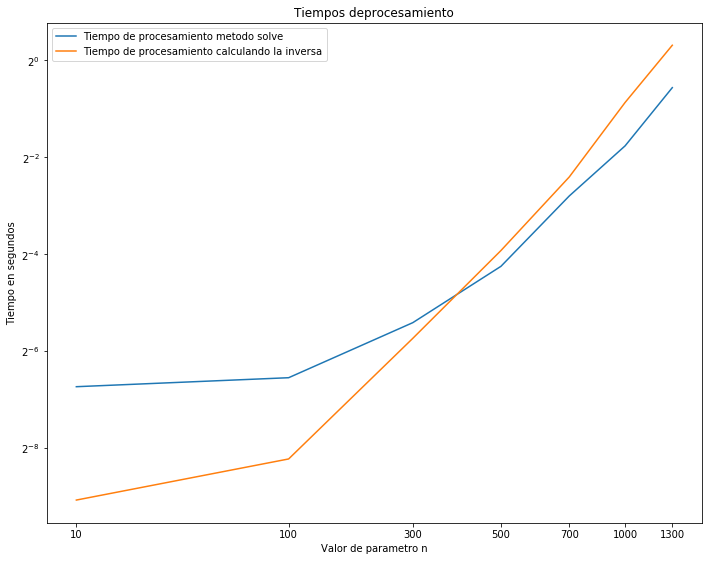

In [149]:
Cs = [10,100, 300, 500, 700, 1000, 1300]
pasos = [1,2,3,4,5,6,7]

plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.loglog(pasos, tiempo1, label='Tiempo de procesamiento metodo solve',basex = 2,basey=2)
plot.loglog(pasos, tiempo2, label='Tiempo de procesamiento calculando la inversa',basex = 2,basey=2)
plt.legend()
plt.title('Tiempos deprocesamiento')
plt.xlabel('Tiempo en Segundos')
plt.ylabel('Tamaño de la matriz')
plt.xticks(pasos, Cs)
plt.tight_layout()
plt.show()

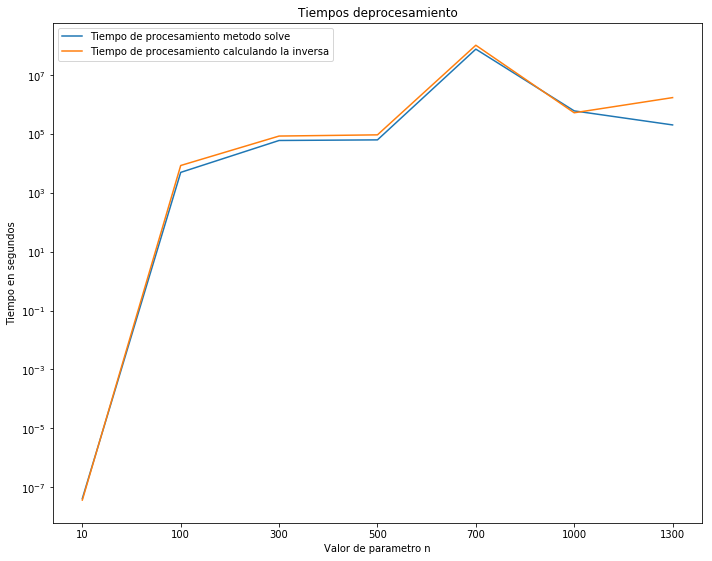

In [150]:
Cs = [10,100, 300, 500, 700, 1000, 1300]
pasos = [1,2,3,4,5,6,7]

plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.semilogy(pasos, error1, label='Error metodo solve')
plot.semilogy(pasos, error2, label='Error calculando la inversa')
plt.legend()
plt.title('Error metodos')
plt.xlabel('Tamaño de la matriz')
plt.ylabel('Error')
plt.xticks(pasos, Cs)
plt.tight_layout()
plt.show()

## Pregunta 3 [40 Pts]

Usando la función *Hilbert(n)* creada anteriormente, repita 50 veces cada método con matrices de tamaño 10, 100, 300, 500, 700, 1000, 1300, y guarde sus tiempos de ejecución. Con esta data, realice un gráfico de *boxplot* [[3]](#bib) de cada método (en total serán 14 *boxplots*), indicando claramente a que método corresponde cada boxplot. Una con una línea las medias de cada método en los boxplots mostrados y concluya.

In [151]:
def pregunta3(R,metodo):
    the_list = [10,100, 300, 500, 700, 1000, 1300]
    time_list = []
    mean_list = []
    for i in the_list:
        H,x,b = Hilbert(i)
        aux_list = []
        for j in range(R):
            start = time.clock()
            if(metodo == 1):
                new_x = linalg.solve(H,b)
            elif(metodo == 2):
                new_x = linalg.inv(H).dot(b)
            end = time.clock()
            aux_list.append(end-start)
        mean_list.append(np.mean(aux_list))
        aux_list.append(metodo)
        aux_list.append(i)
        time_list.append(aux_list)
    return time_list,mean_list

tiemposM1,mean_list1 = pregunta3(50,1)
tiemposM2,mean_list2 = pregunta3(50,2)

tiemposT = []
for i,j in zip(range(7), range(7)):
    tiemposT.append(tiemposM1[i])
    tiemposT.append(tiemposM2[j])

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.279889739544296e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.739638459522049e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.894135436986915e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. 

In [152]:
import pandas as pd
df1 = pd.DataFrame(tiemposM1)
df1 = df1.transpose()
df1.columns = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']
df1.drop(df1.tail(2).index,inplace=True)
#df.index = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']
df2 = pd.DataFrame(tiemposM2)
df2 = df2.transpose()
df2.columns = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']
df2.drop(df2.tail(2).index,inplace=True)

dfT = pd.DataFrame(tiemposT)
dfT = dfT.transpose()
dfT.columns = ['T10.1','T10.2',  'T100.1', 'T100.2','T300.1','T300.2', 'T500.1','T500.2','T700.1','T700.2', 'T1000.1','T1000.2','T1300.1','T1300.2']
dfT.drop(dfT.tail(2).index,inplace=True)

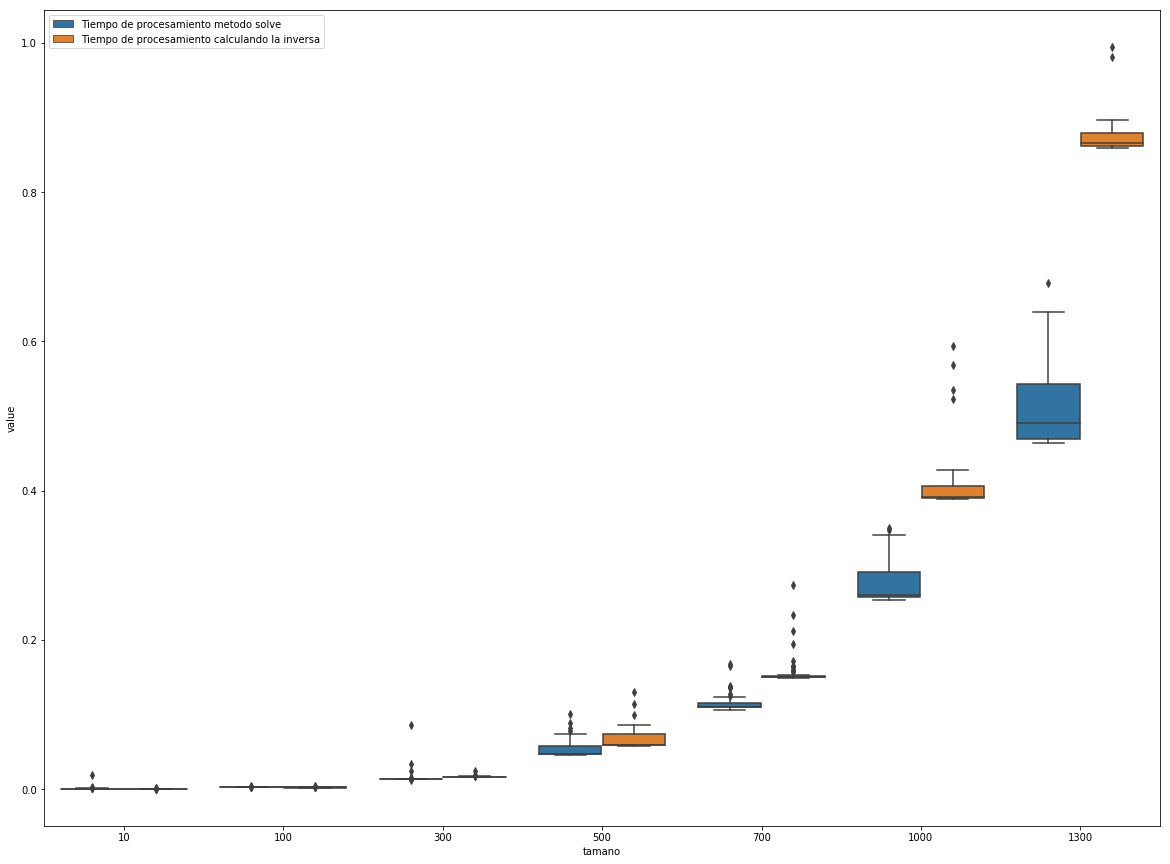

In [153]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns


df1 = pd.DataFrame(tiemposM1)
df1.index = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']
df2 = pd.DataFrame(tiemposM2)
df2.index = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']

df2

cdf = pd.concat([df1,df2])  
cdf = cdf.rename(columns = {50:'metodo'})
cdf = cdf.rename(columns = {51:'tamano'})
mdf = pd.melt(cdf, id_vars=['metodo','tamano'], var_name=['ejecucion'])

fig, ax = pyplot.subplots(figsize=(20, 15))

ax = sns.boxplot(x="tamano", y="value", hue="metodo", data=mdf) 
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Tiempo de procesamiento metodo solve ", "Tiempo de procesamiento calculando la inversa"])
plt.show()

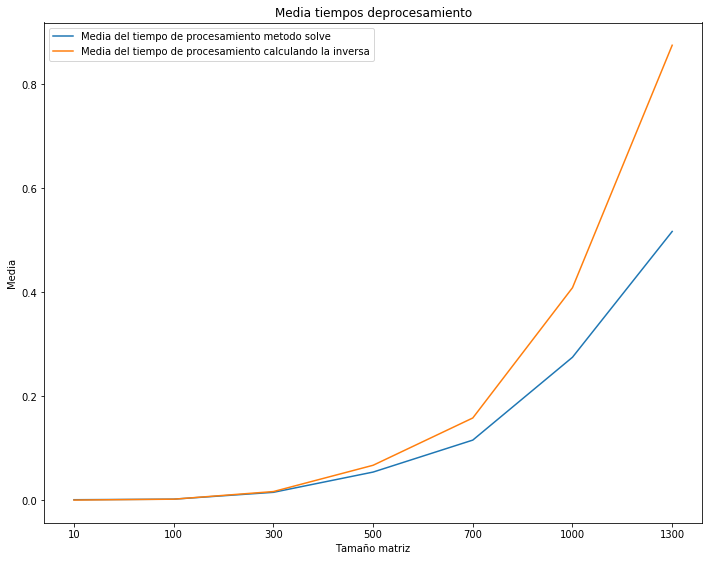

In [154]:
Cs = [10,100, 300, 500, 700, 1000, 1300]
pasos = [1,2,3,4,5,6,7]

plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.plot(pasos, mean_list1, label='Media del tiempo de procesamiento metodo solve')
plot.plot(pasos, mean_list2, label='Media del tiempo de procesamiento calculando la inversa')
plt.legend()
plt.title('Media tiempos deprocesamiento')
plt.xlabel('Tamaño matriz')
plt.ylabel('Media')
plt.xticks(pasos, Cs)
plt.tight_layout()
plt.show()

In [155]:
import string
import pandas as pd
import numpy as np
import plotly.plotly
import plotly.graph_objs as go
import cufflinks as cf

cf.set_config_file(offline=True,world_readable=True, theme = 'ggplot')


data = []
for col in dfT.columns:
    data.append(go.Box(y=dfT[col], name=col, showlegend=True))

config = {'editable': True}
    
data.append(go.Scatter(x=dfT.columns, y=dfT.mean(), mode='lines', name='mean',marker = dict(color='#FF4136')))
plotly.offline.iplot(data,config=config)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Instrucciones:

* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter Notebook` (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados, nombre y rol del estudiante.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código ni utilizar código de otros, aunque sí se sugiere discutir aspectos generales con sus compañeros.
* En caso de sospecha de no cumplimiento de estas instrucciones, se solicitará al involucrado o la involucrada a aclarar la situación. Dependiendo de la justificación se decidirá su calificación, la cual podrá o no ser penalizada.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

<a id='bib'></a>
## Referencias

* 1.- <a href=https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.solve.html>[1] Documentación del método *solve* de  SciPy </a>
* 2.- <a href=https://matplotlib.org/examples/pylab_examples/log_demo.html>[2] Gráficos con *semilogy* y *loglog* </a>
* 3.- <a href=https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots>[3] Crear grupos de boxplots </a>
* 4.- <a https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.hilbert.html> [4] Metodo Hilbert de Scipy